# D206 Data Cleaning Performance Assessment



# Part 1: Research Question
## Research Question or Decision
The data being studied is related to patient readmission rates and possible contributing factors. In order to reduce readmissions, thus reducing the fines to hospitals related to readmissions, we need to clean and analyze the data looking for possible ways to reduce patient readmissions. My research question is: does the patients overall satisfaction, based on the survey questions, impact their likelihood of readmission within a month of discharge.

## Required Variables
The data provided includes patient demographics, information related to their hospitalization, medical conditions, and whether or not they were readmitted. The column names and data types were pulled from the CSV file using pandas library, as shown in Larose (2019), to read the data and dftypes to output the column data type.


In [113]:
# I need to import the csv file and the libraries necessary for data cleaning
import pandas as pd
import numpy as np

md = pd.read_csv('medical_raw_data.csv')
#md.columns.tolist()
md.dtypes


Unnamed: 0              int64
CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis 

# Plan to find Anomalies

## Data Cleaning
My goal with my data cleaning plan will be to make the code more readable and understandable, and to identify null and outlier values to address appropriately. 

For the data cleaning process, I will be using Python to clean the data. Python is regarded as a very easily deployed and readable coding language (Larose, 2019). It has a large amount of community resources to help an individual navigate its packages, making it a versatile tool in data cleaning. I will be utilizing both the NumPy and pandas library to import the data and to carry out various functions.

I will begin by removing extraneous information in the column case number. We will not be calling individually cases during our analyses meaning this column serves us no purpose. Then I will be renaming the survey questions, marked items 1-8, to include a description of what the survey question was asking. Lastly, columns job, income, and marital status could be for the patient or for the primary insurance holder. Without being able to easily identify which individual is being measured, we will not be able to draw conclusions from the data. I will be using the pandas library data frame drop to easily drop all these columns (Pandas Development Team, 2008).

Then I will re-express categorical columns as numeric values. I will be doing this for each categorical column, not including city, and county. This is due to it being unrealistic, and not beneficial, to re-express these columns due to the high variance in possible answers. Doing this will allow me to quickly analyze each column moving forward. I will be following the method outlined by Larose, by creating a dictionary then replacing values within the column using the dictionary.

Before moving to outliers, I will use descriptive statistics to look if there are any values (i.e. minimum time spent in hospital) that are obviously being impacted by null values being entered as 0, or another value. I will then identify outliers and missing answers using boxplots to identify possible erroneous data. If data appears to be left blank by patient on a standard yes/no question it will be left as NaN, otherwise I will be filling using Mean Imputation. This will allow me to retain a high level of data available for analysis.

## Plan to Address Null Values

In order to find null values we will utilize a count method similar to Mark Needham of Big Data Zone (Needham, 2019). By doing a count of null values in each column, we can see that there are 7 columns that have null values. We will handle these columns differently depending on what kind of data they are conveying. For three of these columns children, soft drink, overweight and anxiety they are self-reported. We will move forward with the reasonable idea that the were left blank by the patient because they are not applicable to that person. This means they will be filled with 0, which references no in our dictionaries.

For the values age and initial days, we will be using the mean value to fill their NaNs. We will accomplish this by using the fillna command. I believe that by filling with mean value, we can still pull accurate observations from the data and avoid dropping sever hundreds of rows. In our analysis, we should strive to keep the most number of observations possible, so we can more successfully mine and draw conclusions from the data collected. Dropping rows should only be used as a last resort where there is not enough information to impute null values from.

## Outlier Detection

In order to identify possible outliers, we will create histograms of columns that we will be using for analysis, or where we feel that it is most likely for outliers to exist. This includes age, children, Vitamin D levels, physician visits, initial days, and full meals eaten. These columns are either going highly likely to be used, or due to the nature of the question such as age, may be misfilled due to a typo.

There appears to be quite a few data points lying outside the expected values of the Vitamin D column. We will take a closer look by pulling out rows that have a vitamin D level greater than 30. While there is around 5% of the population reported shown to be outliers, further research shows that a healthy Vitamin D level ranges from 20 ng/ml to 50ng/ml (U.S. Department of Health and Human Services, 2021). This means that these results are within the ranges we would expect to see from a healthy adult.


In [114]:
#Drop columns described in cleaning plan then call columns to show that it has been succesfully dropped
cmd = md.drop(columns = ['CaseOrder', 'Employment', 'Income', 'Marital', 'Job', 'Interaction', 'UID', 'Lat', 'Lng'])
cmd.drop(columns=cmd.columns[0], axis=1, inplace=True)
cmd.dtypes

Customer_id            object
City                   object
State                  object
County                 object
Zip                     int64
Population              int64
Area                   object
Timezone               object
Children              float64
Age                   float64
Education              object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety               float64
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharg

In [115]:
#I will be renaming each 'item' column to better reflect what question was being asked without having to reference the data sheet
cmd.rename(columns={'Item1': 'AdmissionTime', 'Item2': 'TreatmentTime', 'Item3': 'Visits', 'Item4': 'Reliability', 'Item5': 'Options', 'Item6': 'Hours',
           'Item7': 'Courteous', 'Item8': 'ActiveListening'}, inplace = True)
cmd.dtypes

Customer_id            object
City                   object
State                  object
County                 object
Zip                     int64
Population              int64
Area                   object
Timezone               object
Children              float64
Age                   float64
Education              object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety               float64
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharg

# Reexpresion of categorical data

In [116]:
#The states column includes all 50 states as well as Puerto Rico and Washington DC
dict_state = {'State':{'AL' : 1, 'AK' : 2, 'AZ' : 3, 'AR' : 4, 'CA' : 5, 'CO' : 6, 'CT' : 7, 'DE' : 8, 'DC' : 9, 'FL' : 10, 
  'GA' : 11, 'HI' : 12, 'ID' : 13, 'IL' : 14, 'IN' : 15, 'IA' : 16, 'KS' : 17, 'KY' : 18, 'LA' : 19, 'ME' : 20, 
  'MD': 21, 'MA' : 22, 'MI' : 23, 'MN' : 24, 'MS' : 25, 'MO': 26, 'MT' : 27, 'NE' : 28, 'NV' : 29, 'NH' : 30, 
  'NJ' : 31, 'NM' : 32, 'NY' : 33, 'NC' : 34, 'ND' : 35, 'OH' : 36, 'OK' : 37, 'OR' : 38, 'PA' : 39, 'PR' : 40,
  'RI' : 41, 'SC' : 42, 'SD' : 43, 'TN' : 44, 'TX' : 45, 'UT' : 46, 'VT' : 47, 'VA' : 48, 'WA' : 49, 'WV' : 50,
  'WI' : 51, 'WY' : 52}}
cmd.replace(dict_state, inplace=True)

In [117]:
#Area is listed as rural, urban, or suburban
dict_area = {'Area':{'Rural': 1, 'Urban': 2, 'Suburban':3}}
cmd.replace(dict_area, inplace=True)

In [118]:
# I will reexpress timezone based on UTC values
dict_time = {'Timezone':{  'America/Puerto_Rico' : -4, 'America/Detroit' : -5,'America/Indiana/Indianapolis' : -5,
'America/Indiana/Marengo' : -5,'America/Indiana/Vevay' : -5,'America/Indiana/Vincennes' : -5, 'America/Indiana/Winamac' : -5,
'America/Kentucky/Louisville' : -5,'America/Toronto' : -5,'America/New_York' : -5,'America/Chicago' : -6,
'America/Indiana/Knox' : -6,'America/Indiana/Tell_City' :  -6,'America/North_Dakota/New_Salem' : -6, 'America/North_Dakota/Beulah' : -6,
'America/Menominee' : -6,'America/Boise' : -7,'America/Phoenix' : -7,'America/Denver' : -7,'America/Los_Angeles' : -8,
'America/Anchorage' : -9, 'America/Sitka' : -9, 'America/Nome' : -9,  'America/Yakutat' : -9,'America/Adak' : -10,
'Pacific/Honolulu' : -10}}
cmd.replace(dict_time, inplace=True)

In [119]:
# For education I will be ordering the answers by number of years in school, with no education being 0 and Doctorate
#being the highest value at 12.
dict_edu = {'Education':{'No Schooling Completed':0, 'Nursery School to 8th Grade': 1, '9th Grade to 12th Grade, No Diploma':3,
'GED or Alternative Credential': 4, 'Regular High School Diploma': 5,'Some College, Less than 1 Year':6,
'Some College, 1 or More Years, No Degree': 7, "Associate's Degree": 8, "Bachelor's Degree":9,
"Master's Degree":10, 'Professional School Degree':11, 'Doctorate Degree':12}}
cmd.replace(dict_edu, inplace=True)

In [120]:
dict_gender = {'Gender':{'Male': 1, 'Female': 2, 'Prefer not to answer':'3'}}
cmd.replace(dict_gender, inplace=True)

In [121]:
#This will be a similar dictionary to replace each yes/no questions. This will be for ReAdmis column.
dict_admis = {'ReAdmis':{ 'Yes' : 1, 'No': 0}}
cmd.replace(dict_admis, inplace = True)

In [122]:
# Soft drink intake
dict_soft = {'Soft_drink':{ 'Yes' : 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_soft, inplace = True)

In [123]:
# initial admission status
dict_admit = {'Initial_admin':{'Emergency Admission': 3,   'Elective Admission': 2,   'Observation Admission': 1}}
cmd.replace(dict_admit, inplace = True)

In [124]:
#High blood pressure
dict_bp = {'HighBlood':{ 'Yes' : 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_bp, inplace = True)

In [125]:
#Stroke
dict_stroke = {'Stroke':{ 'Yes' : 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_stroke, inplace = True)

In [126]:
#Complication Risk
dict_comp = {'Complication_risk':{'Low': 1, 'Medium': 2, 'High': 3}}
cmd.replace(dict_comp, inplace = True)

In [127]:
# Athritis
dict_ath = {'Arthritis':{'Yes' : 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_ath, inplace = True)

In [128]:
#Diabetes
dict_dia = {'Diabetes':{'Yes' : 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_dia, inplace = True)

In [129]:
#Hyperlipidemia
dict_hype = {'Hyperlipidemia':{'Yes': 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_hype, inplace = True)

In [130]:
#Back Pain
dict_back = {'BackPain':{'Yes': 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_back, inplace = True)

In [131]:
#Allergic Rhinitis
dict_aller = {'Allergic_rhinitis':{'Yes': 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_aller, inplace = True)

In [132]:
# Reflux Esophagitis 
dict_ref = {'Reflux_esophagitis':{'Yes': 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_ref, inplace = True)

In [133]:
#Asthma
dict_ast = {'Asthma': {'Yes': 1, 'No': 0, 'NA': np.NaN}}
cmd.replace(dict_ast, inplace = True)

In [134]:
# Services
dict_ser = {'Services':{ 'Blood Work':1, 'Intravenous': 2, 'CT Scan': 3, 'MRI': 4}}
cmd.replace(dict_ser, inplace = True)


# Null values

In [135]:
null_columns=cmd.columns[cmd.isnull().any()]
cmd[null_columns].isnull().sum()

Children        2588
Age             2414
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64

In [136]:
# First we will fill the null values that we are planning to 0 out
cmd.Children.fillna(0, inplace = True)
cmd.Soft_drink.fillna(0, inplace = True)
cmd.Anxiety.fillna(0, inplace = True)
cmd.Overweight.fillna(0, inplace = True)

#Check to make sure the nulls were replaced
null_columns=cmd.columns[cmd.isnull().any()]
cmd[null_columns].isnull().sum()

Age             2414
Initial_days    1056
dtype: int64

In [137]:
#Replace remaining Null values with the mean value of the column
cmd['Age'] = cmd['Age'].fillna((cmd['Age'].mean()))
cmd['Initial_days'] = cmd['Initial_days'].fillna((cmd['Initial_days'].mean()))

In [138]:
#Show that there are no Null values left
null_columns=cmd.columns[cmd.isnull().any()]
cmd[null_columns].isnull().sum()

Series([], dtype: float64)

# Outlier Detection


<AxesSubplot:>

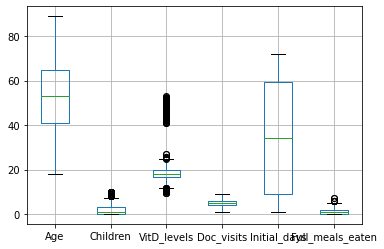

In [139]:
#Using a boxplot to identify outliers in the rows most likely to contain them
cmd.boxplot(['Age', 'Children', 'VitD_levels', 'Doc_visits', 'Initial_days', 'Full_meals_eaten'])


In [140]:
# Printing the levels to show how many rows are considered outliers
vitd_elevated = cmd[cmd['VitD_levels']>=30]
print(vitd_elevated['VitD_levels'])

11      47.813476
94      49.256313
106     49.205398
147     47.757384
170     44.553973
          ...    
9841    47.899167
9907    51.202138
9929    44.494793
9933    45.440725
9973    47.439599
Name: VitD_levels, Length: 500, dtype: float64


array([[<AxesSubplot:title={'center':'VitD_levels'}>]], dtype=object)

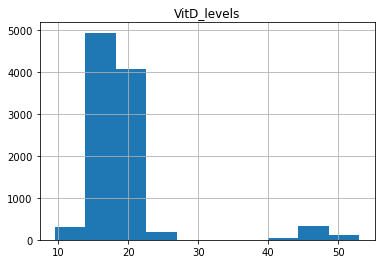

In [141]:
#Histogram showing the Vitamin D levels specifically
cmd[['VitD_levels']].hist()

# Clean Data Save File

In [142]:
cmd.to_csv('cmd_clean_data.csv')

# PCA

In [143]:
# We need to import SciKit PCA
from sklearn.decomposition import PCA

In [144]:
# I will only be selecting columns that are not extraneous (location) or what we are tracking(Readmission)
cmd_prin = cmd[['VitD_levels', 'Doc_visits','AdmissionTime', 'TreatmentTime','Visits', 'Reliability','Options','Hours', 'Courteous','ActiveListening', 'Initial_days']]

In [145]:
# We will need the data normalized to perform the analysis
cmd_normal = (cmd_prin - cmd_prin.mean())/cmd_prin.std()
cmd_normal.head()


,VitD_levels,Doc_visits,AdmissionTime,TreatmentTime,Visits,Reliability,Options,Hours,Courteous,ActiveListening,Initial_days
0,-0.239518,0.944599,-0.502730,-0.489648,-1.463173,-1.462054,0.488355,-0.506114,-0.483647,0.470397,-0.959215
1,-0.062177,-0.967932,-0.502730,0.476699,-0.494890,0.467923,0.488355,0.462525,-0.483647,-0.489009,-0.776442
2,-0.296996,-0.967932,-1.471754,0.476699,0.473394,0.467923,-0.482337,0.462525,-0.483647,-0.489009,-1.193066
3,-0.296373,-0.967932,-0.502730,1.443046,1.441677,-0.497066,0.488355,1.431165,1.474440,1.429802,-1.316046
4,-0.378112,-0.011666,-1.471754,-2.422343,-0.494890,-0.497066,1.459048,-0.506114,0.495396,-0.489009,-1.334552


In [146]:
# We need to instruct on how many components we want for the PCA
pca = PCA(n_components=cmd_prin.shape[1])

In [147]:
#Calling PCA on the data we would like analysed
pca.fit(cmd_normal)
cmd_pca = pd.DataFrame(pca.transform(cmd_normal),
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11'])

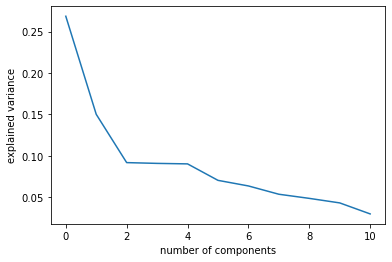

In [148]:
#We will call new libraries before finishing the PCA process
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [149]:
# Extract Eigen Values
cov_matrix = np.dot(cmd_normal.T, cmd_normal) / cmd_prin.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

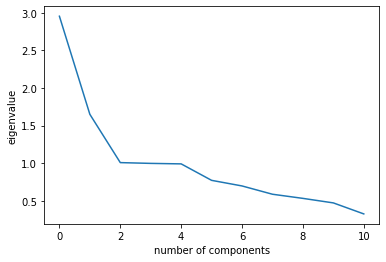

In [150]:
#Rerun as eigenvalues
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show()

In [151]:
#Find out which three values are beneficial
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11'],
index=cmd_prin.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
VitD_levels,-0.002600,-0.040705,-0.214855,0.975384,0.014202,-0.010693,-0.003225,-0.013590,-0.007955,0.007516,0.012958
Doc_visits,0.007034,-0.006297,-0.698744,-0.164756,0.694677,-0.018878,-0.027789,-0.025275,0.007672,-0.010826,-0.001895
AdmissionTime,0.454785,0.296496,-0.005296,0.021050,-0.008555,-0.096410,-0.075321,-0.011248,0.084957,0.184435,-0.805225
TreatmentTime,0.428484,0.293057,0.013954,0.002287,0.011369,-0.147109,-0.133850,-0.061524,0.102606,0.624836,0.534696
Visits,0.395350,0.295962,0.016778,0.009639,-0.009316,-0.205970,-0.212619,-0.238893,-0.433780,-0.621107,0.192365
Reliability,0.152326,-0.557738,0.017130,-0.024158,-0.040827,-0.367269,-0.362151,-0.387978,0.483170,-0.114136,-0.011542
Options,-0.190198,0.583678,-0.006781,0.028917,-0.004168,0.124180,0.056881,-0.133338,0.694409,-0.308248,0.092677
Hours,0.410486,-0.164213,-0.009383,0.005431,0.009364,-0.050131,0.061490,0.796456,0.267728,-0.276114,0.125607
Courteous,0.356760,-0.173727,0.014030,-0.004722,0.028904,0.038409,0.846268,-0.335556,0.069368,-0.061817,0.051092
ActiveListening,0.312791,-0.167104,-0.002449,0.000130,-0.000675,0.878558,-0.274192,-0.151467,0.040995,-0.038114,0.033327


# Data Cleaning Findings

Several missing values were identified in the columns Children, Age, soft drink intake, Overweight, Anxiety, and Initial Days spent in hospital. We utilized the mean of the columns where there was a wide range of numeric answers possible, to maintain a high number of rows to be later analyzed. We also concluded that an individual was more likely to leave a question blank if they felt it did not apply to them. Outside of this, there were few anomalies to adress.The apparent outliers in the Vitamin D Levels, were found to be within an acceptable range of possible values upon further research.

The justification of using the mean values, or filling answers as a no, comes from our inability to retroactively reach out to the patients to adress the missing values, or rerun testing. In this case I believe there was no better option to maintain the integrity of the data available moving forward.I do not believe that any of the issues that were identified will impact the data question established at the beginning of the paper.

## Principal Component Analysis

For the principal analysis I loaded 11 components. These are the 8 survey responses, days of intial visit, doctor visits, and vitamin d levels. For the survey responses and doctor visits, I believe that the perceived quality of care received would be an innacurate indicator of the level of treatment and service. With an increased level of treatment and face to face time with the doctor, you would logically expect to see lower readmittance. The initial visit length can clue us in to the severity of the original illnes, and the large discrepancy in vitamin d levels observed earlier in the cleaning lead me to conclude that they may play a larger roll in a patients treatment and long term health.

The PCA revealed that after 4 components, we do see a high rate of return on additional components. Based on the extracted values, I belive that the following components should be considered 'most important':
-Vitamin D Levels (based on PC4)
-Initial Days of First Visit (PC3)
-Presentation of Options (PC2)
-Admission time (PC1)

By moving forward with this knowledge the organization can save time and processing power by focusing on the impact of these 4 components.





# Annotations
Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.

Pandas Development Team. (2008). pandas.DataFrame.drop — pandas 1.3.0 documentation. Pandas.
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.
    
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

U.S. Department of Health and Human Services. (2021, March 26). Office of Dietary Supplements - Vitamin D. NIH Office of Dietary Supplements. https://ods.od.nih.gov/factsheets/VitaminD-HealthProfessional/#h4. 
